In [1]:
import numpy as np
import sympy
from sympy import S, symbols, Function, dsolve, solveset, linsolve, integrate, diff, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt

## Занятие 18
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
### Задача 1
Решить ОДУ $3y''+5y'-2y=0$ по формуле из файла с примерами и с помощью dsolve.

In [7]:
x, y, k, C1, C2 = symbols('x y k C_1 C_2')
roots = solveset(3 * k ** 2 + 5 * k - 2)
display(roots)
roots = [*roots]
Y = sympy.Eq(y, C1 * Exp(roots[0] * x) + C2 * Exp(roots[1] * x))
display(Y)

FiniteSet(-2, 1/3)

Eq(y, C_1*exp(-2*x) + C_2*exp(x/3))

In [8]:
y = Function('y')
dsolve(3 * y(x).diff(x, 2) + 5 * y(x).diff(x) - 2 * y(x), y(x))

Eq(y(x), C1*exp(-2*x) + C2*exp(x/3))

### Задача 2.
Решить задачу Коши:
$$
\left\{
\begin{matrix}
9y''+3y'+y=0\\
y(0)=0\\
y'(0)=2\sqrt3
\end{matrix}
\right.
$$
##### Указание.
Решить с помощью dsolve, затем составить словарь символов решения, ключи - 'x', 'C1', 'C2', а значения - соответствующие элементы из множества  ХХХ.rhs.free_symbols, решить систему линейных относительно С1 и С2 уравнений, описывающих начальные условия.

In [17]:
x, y, k, C1, C2 = symbols('x y k C_1 C_2')
y = Function('y')
sol = dsolve(9 * y(x).diff(x, 2) + 3 * y(x).diff(x) + y(x), y(x))
display(sol)
sym = {
    x: [*sol.rhs.free_symbols][0],
    C1: [*sol.rhs.free_symbols][2],
    C2: [*sol.rhs.free_symbols][1]
}
eq = sol.rhs
eq1 = eq.subs({x: 0, sym[C2]: C2, sym[C1]: C1})
eq2 = eq.diff(x).subs({x: 0, sym[C2]: C2, sym[C1]: C1}) - 2 * sympy.sqrt(3)
C = linsolve([eq1, eq2], C1, C2)
c1 = [*C][0][0]
c2 = [*C][0][1]
display(sol.subs({sym[C1]: c1, sym[C2]: c2}))

Eq(y(x), (C1*sin(sqrt(3)*x/6) + C2*cos(sqrt(3)*x/6))*exp(-x/6))

Eq(y(x), 12*exp(-x/6)*sin(sqrt(3)*x/6))

### Индивидуальное задание
Решить с помощью dsolve:
$$
y''' + y'' + y' + y = (4x + 6)e^{2x}.
$$
Построить график $y(x)$ при начальных условиях $y(0) = 4$, $y'(0) = 2$, $y''(0) = 0$.


Вариант 2

$$y''' + y'' + y' + y=\left(9 x^{2} + 2 x - 2\right) e^{2 x},\qquad y(0)=3,\qquad y'(0)=-3,\qquad y''(0)=-2$$


Eq(y(x), C1*exp(-x) + C2*sin(x) + C3*cos(x) + (675*x**2 - 1380*x + 784)*exp(2*x)/1125)

Eq(y(x), (675*x**2 - 1380*x + 784)*exp(2*x)/1125 - 7*sin(x)/125 - 101*cos(x)/125 + exp(-x)/9)

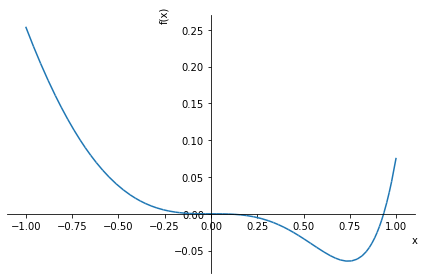

In [42]:
x, y, k, C1, C2, C3 = symbols('x y k C_1 C_2 C_3')
y = Function('y')
eq = sympy.Eq(y(x).diff(x, 3) + y(x).diff(x, 2) + y(x).diff(x, 1) + y(x), (9 * (x ** 2) + 2 * x - 2) * Exp(2 * x))
sol = dsolve(eq, y(x))
display(sol)
sym = {
    x: [*sol.rhs.free_symbols][1],
    C1: [*sol.rhs.free_symbols][2],
    C2: [*sol.rhs.free_symbols][3],
    C3: [*sol.rhs.free_symbols][0]
}
eqs = [
      sol.rhs.subs({x: 0, y: 4, sym[C1]: C1, sym[C2]: C2, sym[C3]: C3}),
      sol.rhs.diff(x, 1).subs({x: 0, y: 2, sym[C1]: C1, sym[C2]: C2, sym[C3]: C3}),
      sol.rhs.diff(x, 2).subs({x: 0, y: 0, sym[C1]: C1, sym[C2]: C2, sym[C3]: C3})
]
C = linsolve(eqs, C1, C2, C3)
eq = sol.subs({sym[C1]: [*C][0][0], sym[C2]: [*C][0][1], sym[C3]: [*C][0][2]})
display(eq)
sympy.plot(eq.rhs.subs({sym[x]: x}), (x, -1, 1))